<a href="https://colab.research.google.com/github/xinhuiiii/fin_data/blob/main/financial_data_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #匯入套件

In [12]:
data={
    '季別':("Q1","Q2","Q3","Q4"),
    '收入':(100,200,300,400)
} #輸入資料

In [13]:
df = pd.DataFrame(data)#轉成資料表

In [14]:
df #顯示資料表

,季別,收入
0,Q1,100
1,Q2,200
2,Q3,300
3,Q4,400


In [2]:
!pip install fredapi #下載FRED的API

In [5]:
from fredapi import Fred #呼叫FRED套件

In [6]:
fred = Fred(api_key="d99654a6627f90ec37c00e507c440f7b") #後面要使用自己的API_KEY

In [8]:
data1 = fred.get_series('SP500') #下載股市資料

In [9]:
data1 = fred.get_series('SP500',"6/1/2021") #設定期間

In [10]:
type(data1) #查看資料型態

pandas.core.series.Series

In [11]:
data1

,0
2021-06-01,4202.04
2021-06-02,4208.12
2021-06-03,4192.85
2021-06-04,4229.89
2021-06-07,4226.52
...,...
2024-12-16,6074.08
2024-12-17,6050.61
2024-12-18,5872.16
2024-12-19,5867.08


<Axes: >

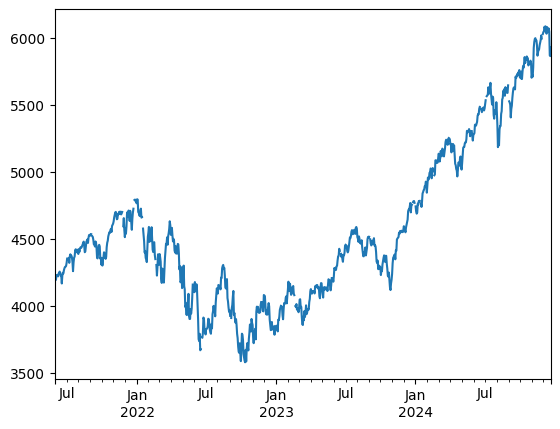

In [14]:
data1.plot() #繪製圖表

In [15]:
data2 = fred.get_series('RRPONTSYD')

In [16]:
data2 = fred.get_series('RRPONTSYD','6/1/2021')

<Axes: >

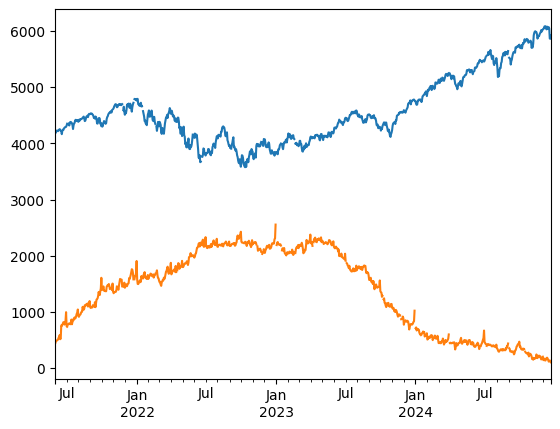

In [18]:
data1.plot()
data2.plot() #結合data1和data2製作一張圖表

In [19]:
df1 = data1.to_frame(name='SP500')
df2 = data2.to_frame(name='RRPONTSYD') #將series型態轉為dataframe型態

In [21]:
import pandas as pd
df_merged = pd.concat([df1,df2],axis=1) #合併資料

In [22]:
import matplotlib
import matplotlib.pyplot as plt #呼叫繪圖套件

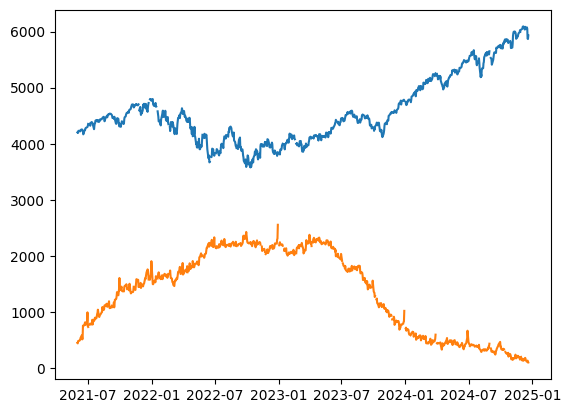

In [23]:
plt.plot(df_merged.index,df_merged['SP500'])
plt.plot(df_merged.index,df_merged['RRPONTSYD']) #繪圖(舊版)

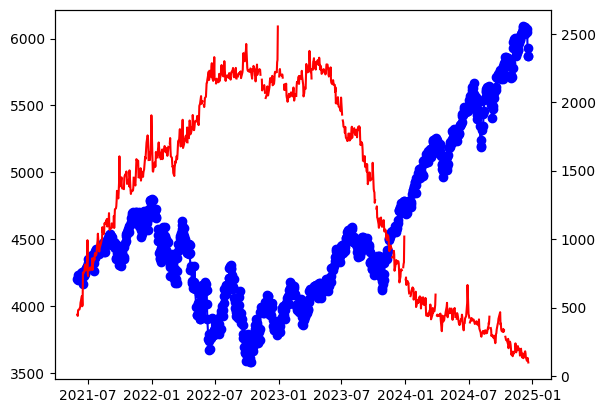

In [25]:
fig,ax = plt.subplots()
ax.plot(df_merged.index,
df_merged['SP500'],color ='blue',marker='o')
ax2=ax.twinx()
ax2.plot(df_merged.index,
df_merged['RRPONTSYD'],color='red')
fig.savefig('折線圖.jpg',format='jpeg') #繪圖，兩個y軸並存檔

In [26]:
df_merged.corr() #計算相關係數

,SP500,RRPONTSYD
SP500,1.000000,-0.871655
RRPONTSYD,-0.871655,1.000000


<Axes: >

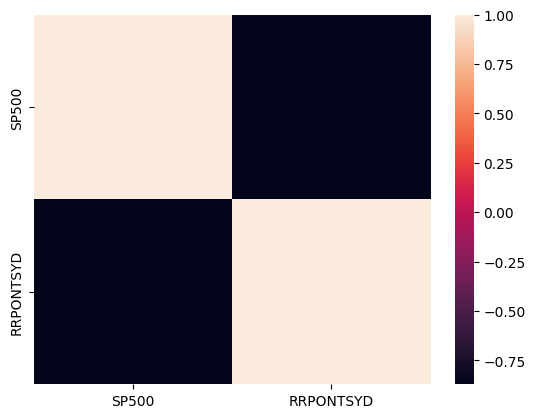

In [27]:
import seaborn as sns
sns.heatmap(df_merged.corr())

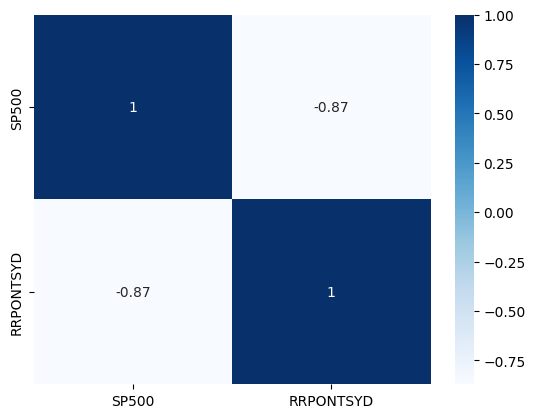

In [30]:
svm = sns.heatmap(df_merged.corr(),cmap ='Blues',annot=True)
figure = svm.get_figure()
figure.savefig('相關係數.png',dpi=400) #用另一個模板繪圖並將圖形存檔

In [42]:
url = 'https://raw.githubusercontent.com/fju155447/fin_data2/main/balance_sheet.csv'

In [43]:
df1 = pd.read_csv(url,index_col=0,encoding='unicode_escape') #讀取該網址資料並且以第0欄為index

In [44]:
df1

,YYYY/MM,Quarter,consolidation,Month,Currency,Total cash and cash equivalents,Total current financial assets at fair value through profit or loss,Financial assets at fair value through other comprehensive income - Current,Financial assets measured at amortized cost - Current,Current financial assets for hedging,Current contract assets,Accounts & notes receivable,Other receivable,Loan to others - Short-Term,Total inventories,"Current biological assets, net",Total prepayments,Agency current-debit (for sea/land shipping business),"Non-current assets classified as held for sale, net",Total current tax assets,Other current financial assets,Other current assets,Total current assets,Total non-current financial assets at fair value through profit or loss,Financial assets at fair value through other comprehensive income - Non-Current,Financial assets measured at amortized cost - Non-Current,Non-current financial assets for hedging,Non-current contract assets,"Investments accounted for using equity method, net",Non-current prepayments for investments,"Total property, plant and equipment",Goodwill,"Franchise, net","Intangible assets under development, net",Other intangible assets,Goodwill and intangible assets,Deferred tax assets,Other deferred assets,Deferred assets,"Deferred debits, losses on inter-affiliate accounts",Right of use assets,"Investment property, net",Prepayments for business facilities,Long-term prepaid rents,Total non-current biological assets,Total other non-current assets - Others,Total other non-current assets,Total non-current assets,Total assets,Total short-term borrowings,...,OCI-Gain(loss) on hedging instrucment - not reclassified to profit or loss,OCI-Gain(loss) on share of associate&joint venture acc.-not reclassified to P/L,OCI-Others - not reclassified to profit or loss,OCI-Income tax relating to components - not reclassified to profit or loss,OCI-Items that are not reclassified to profit or loss,OCI-Translat. diff. of foreign operat. agency's report-maybe reclassified to P/L,OCI-Non-curr. assets held for sale or assigned owners-maybe reclassified to P/L,OCI-Unrealized G(L) on FVOCI investment in debt instr.-maybe reclassified to P/L,OCI-Gain(loss) on hedging instrucment - maybe reclassified to profit or loss,OCI-G(L) on share of associate&joint venture acc.-maybe reclassified to P/L,OCI-Others - maybe reclassified to profit or loss,OCI-Income tax relating to components - maybe reclassified to profit or loss,OCI-Subsequent items that are or maybe reclassified to profit or loss,OCI-Attributable to non-controlling interest in pre-acquisition share capital,"Other comprehensive income, net",Comprehensive income,"Profit (loss), attributable to owners of parent","Profit (loss), attributable to non-controlling interests","Profit (loss), attributable to interests in the former jointly controlled entity","Comprehensive income, attributable to owners of parent","Comprehensive income, attributable to non-controlling interests","Comprehensive income, attributable to non-controlling interest in pre-aquisition",Total basic earnings per share,Average common shares (Thousand),Preferred stock dividends,Diluted net income,Total diluted earnings per share,Average diluted common shares (Thousand),Earnings before interest and tax,"Earnings before interest, tax, depreciation and amortization",Recurring net income,Treasury shares-buys back,Treasury shares-subsidiary holding,Total treasury shares,Cash dividends - Common stock - Interim,Stock dividends - Common stock - Interim,Cash dividends - Preferred stock - Interim,Stock dividends - Preferred stock - Interim,Cash dividends - Common stock,Stock dividends - Common stock,Cash dividends - Preferred stock,Stock dividends - Preferred stock,Cash dividend per share,Cash dividend per share - Retained earnings,Cash dividend per share - Capital surplus,Stock dividend per share - Retained earnings,Stock dividend per share - Capital surplus,Cash dividends from capital surplus,Stock dividends f

In [51]:
url='https://raw.githubusercontent.com/fju155447/fin_data2/main/income_statement.csv'

In [52]:
df2 = pd.read_csv(url,index_col=0,encoding='unicode_escape') #讀取該網址資料

In [53]:
df2

,YYYY/MM,Quarter,consolidation,Month,Currency,Gross operating revenue,Total rental revenue,Operating revenue - Disposal of lands,Interest revenue,Operating revenue - disposal of investments,Total investment revenue,Sales discounts and allowances,Total operating revenue,Cost of goods sold (A) ¡@,Operating cost - Rent,Operating cost - disposal of lands,Interest expense,Operating cost - disposal of investments,Total investment losses,Total operating costs,Gross profit (loss) from operations,Realized (unrealized) profit - affliated companies,Realized gross operating profit,Total operating expenses,Total selling expenses,Total administrative expenses,Total research and development expenses,"Other expense, by function",Expected credit impairment (loss) gain,Net other income (expenses),Net operating income (loss),Total interest income,Rent income,Revenue from royalties,Revenue from dividends,Gain recognised in bargain purchase transaction,Income from counter-party default,Gains on expected credit impairment,Gains on write-off of past due payable,Government grants income,"Other income, others",Other Non-Operating Income,"Gains on disposals of property, plant and equipment",Gains on disposals of investments,Foreign exchange gains,Gains on financial assets (liabilities) at fair value through profit or loss,Gain on financial liabilities measured at amortized cost,Gain on hedging instrument,Gain on valuation of assets,"Reversal of impairment loss recognised in profit or loss, financial assets",...,Gain (loss) on derecognition of fin. assets meas. at amortized cost,Gain (loss) on financial assets reclassification,"Non-operating income and expenses, other",Total non-operating income and expenses,Profit (loss) before tax,Total tax expense (income),Profit (loss) from continuing operations,Total profit (loss) from discontinued operations,"Comprehensive income, attributable to non-controlling interests in pre-aquisitio",Other adj. item - I/S,Profit (loss),OCI-Remeasurement of defined benefit plans - not reclassified to profit or loss,OCI-Gain (loss) on revaluation of property - not reclassified to profit or loss,OCI-Credit risk on FV measurement of FL - not reclassified to profit or loss,OCI-Non-curr. assets held for sale or assigned owners-not reclassified to P/L,OCI-Unrealized G(L) on FVOCI investments in equity - not reclassified to P/L,OCI-Gain(loss) on hedging instrucment - not reclassified to profit or loss,OCI-Gain(loss) on share of associate&joint venture acc.-not reclassified to P/L,OCI-Others - not reclassified to profit or loss,OCI-Income tax relating to components - not reclassified to profit or loss,OCI-Items that are not reclassified to profit or loss,OCI-Translat. diff. of foreign operat. agency's report-maybe reclassified to P/L,OCI-Non-curr. assets held for sale or assigned owners-maybe reclassified to P/L,OCI-Unrealized G(L) on FVOCI investment in debt instr.-maybe reclassified to P/L,OCI-Gain(loss) on hedging instrucment - maybe reclassified to profit or loss,OCI-G(L) on share of associate&joint venture acc.-maybe reclassified to P/L,OCI-Others - maybe reclassified to profit or loss,OCI-Income tax relating to components - maybe reclassified to profit or loss,OCI-Subsequent items that are or maybe reclassified to profit or loss,OCI-Attributable to non-controlling interest in pre-acquisition share capital,"Other comprehensive income, net",Comprehensive income,"Profit (loss), attributable to owners of parent","Profit (loss), attributable to non-controlling interests","Profit (loss), attributable to interests in the former jointly controlled entity","Comprehensive income, attributable to owners of parent","Comprehensive income, attributable to non-controlling interests","Comprehensive income, attributable to non-controlling interest in pre-aquisition",Total basic earnings per share,Average common shares (Thousand),Preferred stock dividends,Diluted net income,Total diluted earnings per share,Average diluted common shares (Thousand

In [56]:
df1.columns #顯示df1欄位

Index(['YYYY/MM', 'Quarter', 'consolidation', 'Month', 'Currency',
       'Total cash and cash equivalents',
       'Total current financial assets at fair value through profit or loss',
       'Financial assets at fair value through other comprehensive income - Current',
       'Financial assets measured at amortized cost - Current',
       'Current financial assets for hedging',
       ...
       'Cash dividends - Preferred stock', 'Stock dividends - Preferred stock',
       'Cash dividend per share',
       'Cash dividend per share - Retained earnings',
       'Cash dividend per share - Capital surplus',
       'Stock dividend per share - Retained earnings',
       'Stock dividend per share - Capital surplus',
       'Cash dividends from capital surplus',
       'Stock dividends from capital surplus',
       'Employee stock Bonus (actual)'],
      dtype='object', length=255)

In [57]:
df2.columns #顯示df2欄位

Index(['YYYY/MM', 'Quarter', 'consolidation', 'Month', 'Currency',
       'Gross operating revenue', 'Total rental revenue',
       'Operating revenue - Disposal of lands', 'Interest revenue',
       'Operating revenue - disposal of investments',
       ...
       'Preferred stock dividends', 'Diluted net income',
       'Total diluted earnings per share',
       'Average diluted common shares (Thousand)',
       'Earnings before interest and tax',
       'Earnings before interest, tax, depreciation and amortization',
       'Recurring net income', 'Treasury shares-buys back',
       'Treasury shares-subsidiary holding', 'Total treasury shares'],
      dtype='object', length=133)

In [58]:
df1.index #顯示df1索引

Index(['1101 TCC', '1102 ACC'], dtype='object', name='CO_ID')

In [59]:
df2.index #顯示df2索引

Index(['1101 TCC', '1102 ACC'], dtype='object', name='CO_ID')

In [60]:
A_1101 = (df1.loc['1101 TCC','Total current assets'] - df1.loc['1101 TCC','Total current liabilities'])/df1.loc['1101 TCC','Total assets']

In [61]:
A_1101

0.17154975620002486

In [65]:
X1 ='Total current assets'
X2 ='Total current liabilities'
X3 ='Total assets'
X4 ='Total retained earnings'
X5 ='Earnings before interest and tax'
X6 ='Total equity'
X7 ='Total operating revenue'
X8 ='Total operating revenue'
TCC ='1101 TCC'
ACC ='1102 ACC' #簡化後續公式


In [67]:
A_TCC = (df1.loc[TCC,X1] - df1.loc[TCC,X2])/df1.loc[TCC, X3] #計算A指標

In [68]:
B_TCC = df1.loc[TCC,X4]/df1.loc[TCC, X3] #計算B指標

In [69]:
C_TCC = df2.loc[TCC,X5]/df1.loc[TCC, X3] #計算C指標

In [70]:
D_TCC = df1.loc[TCC,X6]/df1.loc[TCC, X7] #計算D指標

In [71]:
E_TCC = df2.loc[TCC,X8]/df1.loc[TCC, X3] #計算E指標

In [72]:
Z_score_TCC = 1.2*A_TCC + 1.4*B_TCC + 3.3*C_TCC + 0.6*D_TCC+1.0*E_TCC #計算Z分數

In [73]:
Z_score_TCC,A_TCC,B_TCC,C_TCC,D_TCC,E_TCC

(2.1686310345016953,
 0.17154975620002486,
 0.15034296865820485,
 0.03812962541663762,
 2.3226692180856245,
 0.23286187621389964)

In [74]:
A_ACC = (df1.loc[ACC,X1] - df1.loc[ACC,X2])/df1.loc[ACC, X3] #計算A指標

In [75]:
B_ACC = df1.loc[ACC,X4]/df1.loc[ACC, X3] #計算B指標

In [76]:
C_ACC = df2.loc[ACC,X5]/df1.loc[ACC, X3] #計算C指標

In [77]:
D_ACC = df1.loc[ACC,X6]/df1.loc[ACC, X7] #計算D指標

In [78]:
E_ACC = df2.loc[ACC,X8]/df1.loc[ACC, X3] #計算E指標

In [79]:
Z_score_ACC = 1.2*A_ACC + 1.4*B_ACC + 3.3*C_ACC + 0.6*D_ACC+1.0*E_ACC #計算Z分數

In [80]:
Z_score_ACC,A_ACC,B_ACC,C_TCC,D_ACC,E_ACC

(2.4242682118200505,
 0.11716660516627467,
 0.3501663370468784,
 0.03812962541663762,
 2.323816022548033,
 0.2451957981812386)